In [49]:
from mapclassify import EqualInterval
import pandas as pd
import os

datadis=pd.read_excel(os.path.join('data','Generacion_residuos.xlsx'),
                     dtype={'Ubigeo': object})
datadis.head()

,FECHA_CORTE,N_SEC,UBIGEO,REG_NAT,DEPARTAMENTO,PROVINCIA,DISTRITO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_DOM,PERIODO
0,2023-01-09,1,10101,SELVA,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,28423,27548,875,"4857,50",2014
1,2023-01-09,2,10102,SELVA,AMAZONAS,CHACHAPOYAS,ASUNCION,291,151,140,"33,56",2014
2,2023-01-09,3,10103,SIERRA,AMAZONAS,CHACHAPOYAS,BALSAS,1615,299,1316,"48,96",2014
3,2023-01-09,4,10104,SIERRA,AMAZONAS,CHACHAPOYAS,CHETO,597,388,209,"63,59",2014
4,2023-01-09,5,10105,SIERRA,AMAZONAS,CHACHAPOYAS,CHILIQUIN,737,197,540,"32,38",2014


In [50]:
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

datadismap=gpd.read_file(os.path.join('maps','DistritosMap.zip'))

datadismap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [51]:
#EJERCICIO 1
#Ambas tablas tienen los nombres de las columnas en mayusculas por lo que no hay necesidad de cambiarlas
#Procederemos a limpiar el nombre de algunos distritos de simbols como _, -, etc.
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
datadis[['PROVINCIA','DISTRITO']]=datadis[['PROVINCIA','DISTRITO']].applymap(byePunctuation)
datadismap[['PROVINCIA','DISTRITO']]=datadismap[['PROVINCIA','DISTRITO']].applymap(byePunctuation)

In [52]:
len(datadis.DISTRITO),len(datadismap.DISTRITO)
#Hay diferencias en el número de ditritos entre tablas

(14978, 1874)

In [53]:
datadis.DISTRITO.duplicated().sum(),datadismap.DISTRITO.duplicated().sum()

(13236, 152)

In [54]:
#Debido a que se repiten algunos distritos en distintas provincias vamos a juntar provincia-distrito para diferenciar
datadis['provDist']=["+".join(pd) for pd in zip (datadis.PROVINCIA,datadis.DISTRITO)]
datadismap['provDist']=["+".join(pd) for pd in zip (datadismap.PROVINCIA,datadismap.DISTRITO)]

In [55]:
datadis['provDist'].head()

0 CHACHAPOYAS+CHACHAPOYAS
1 CHACHAPOYAS+ASUNCION
2 CHACHAPOYAS+BALSAS
3 CHACHAPOYAS+CHETO
4 CHACHAPOYAS+CHILIQUIN
Name: provDist, dtype: object

In [56]:
datadis.provDist=datadis.provDist.str.replace("\-|\_|\s+"," ",regex=True)
datadismap.provDist=datadismap.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [57]:
#Observamos que datos no se comparten entre tablas
nomatch_df=set(datadis.provDist)- set(datadismap.provDist)
nomatch_gdf=set(datadismap.provDist)-set(datadis.provDist) 
len(nomatch_df), len(nomatch_gdf)

(231, 215)

In [58]:
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ACOBAMBA+ACOBAMBA ', ('ACOBAMBA+ACOBAMBA', 100)),
 ('ACOBAMBA+PAUCARA ', ('ACOBAMBA+PAUCARA', 100)),
 ('ACOMAYO+SANGARARA', ('ACOMAYO+SANGARARA ', 100)),
 ('ANDAHUAYLAS+ANDAHUAYLAS ', ('ANDAHUAYLAS+ANDAHUAYLAS', 100)),
 ('ANDAHUAYLAS+JOSno MARheA ARGUEDAS ', ('ANDAHUAYLAS+ANDAHUAYLAS', 95)),
 ('ANGARAES+HUAYLLAY GRANDE', ('ANGARAES+HUALLAY GRANDE', 98)),
 ('AREQUIPA+CERRO COLORADO ', ('AREQUIPA+CERRO COLORADO', 100)),
 ('AREQUIPA+QUEQUEmuA', ('AREQUIPA+QUEQUENA', 91)),
 ('AREQUIPA+VITOR ', ('AREQUIPA+VITOR', 100)),
 ('ASUNCImoN+ACOCHACA', ('ASUNCION+ACOCHACA', 97)),
 ('ASUNCImoN+CHACAS', ('ASUNCION+CHACAS', 97)),
 ('ATALAYA+RAIMONDI', ('ATALAYA+RAYMONDI', 94)),
 ('AYMARAES+CARAYBAMBA', ('AYMARAES+CARAIBAMBA', 95)),
 ('AYMARAES+SAN JUAN DE CHACmuA', ('AYMARAES+SAN JUAN DE CHACNA', 95)),
 ('AYMARAES+SAmuAYCA', ('AYMARAES+SANAYCA', 91)),
 ('AZANGARO+CAMINACA ', ('AZANGARO+CAMINACA', 100)),
 ('AZANGARO+MUmuANI', ('AZANGARO+MUNANI', 90)),
 ('BAGUA+BAGUA ', ('BAGUA+BAGUA', 100)),
 ('BAGUA

In [59]:
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'ACOBAMBA+ACOBAMBA ': 'ACOBAMBA+ACOBAMBA',
 'ACOBAMBA+PAUCARA ': 'ACOBAMBA+PAUCARA',
 'ACOMAYO+SANGARARA': 'ACOMAYO+SANGARARA ',
 'ANDAHUAYLAS+ANDAHUAYLAS ': 'ANDAHUAYLAS+ANDAHUAYLAS',
 'ANDAHUAYLAS+JOSno MARheA ARGUEDAS ': 'ANDAHUAYLAS+ANDAHUAYLAS',
 'ANGARAES+HUAYLLAY GRANDE': 'ANGARAES+HUALLAY GRANDE',
 'AREQUIPA+CERRO COLORADO ': 'AREQUIPA+CERRO COLORADO',
 'AREQUIPA+QUEQUEmuA': 'AREQUIPA+QUEQUENA',
 'AREQUIPA+VITOR ': 'AREQUIPA+VITOR',
 'ASUNCImoN+ACOCHACA': 'ASUNCION+ACOCHACA',
 'ASUNCImoN+CHACAS': 'ASUNCION+CHACAS',
 'ATALAYA+RAIMONDI': 'ATALAYA+RAYMONDI',
 'AYMARAES+CARAYBAMBA': 'AYMARAES+CARAIBAMBA',
 'AYMARAES+SAN JUAN DE CHACmuA': 'AYMARAES+SAN JUAN DE CHACNA',
 'AYMARAES+SAmuAYCA': 'AYMARAES+SANAYCA',
 'AZANGARO+CAMINACA ': 'AZANGARO+CAMINACA',
 'AZANGARO+MUmuANI': 'AZANGARO+MUNANI',
 'BAGUA+BAGUA ': 'BAGUA+BAGUA',
 'BAGUA+LA PECA ': 'BAGUA+LA PECA',
 'CAJAMARCA+ENCAmuADA': 'CAJAMARCA+ENCANADA',
 'CAJAMARCA+LOS BAmuOS DEL INCA': 'CAJAMARCA+LOS BANOS DEL INCA',
 'CALLAO+MI 

In [60]:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [61]:
datadis.provDist.replace(changesDis_df,inplace=True)

In [62]:
datadismap=datadismap.merge(datadis, on='provDist')
datadismap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14978 entries, 0 to 14977
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DEPARTAMEN     14978 non-null  object        
 1   PROVINCIA_x    14978 non-null  object        
 2   DISTRITO_x     14978 non-null  object        
 3   INSTITUCIO     14978 non-null  object        
 4   geometry       14978 non-null  geometry      
 5   provDist       14978 non-null  object        
 6   FECHA_CORTE    14978 non-null  datetime64[ns]
 7   N_SEC          14978 non-null  int64         
 8   UBIGEO         14978 non-null  int64         
 9   REG_NAT        14978 non-null  object        
 10  DEPARTAMENTO   14978 non-null  object        
 11  PROVINCIA_y    14978 non-null  object        
 12  DISTRITO_y     14978 non-null  object        
 13  POB_TOTAL      14978 non-null  int64         
 14  POB_URBANA     14978 non-null  int64         
 15  POB_RURAL  

In [63]:
bye=["DEPARTAMEN","PROVINCIA_x","DISTRITO_x","INSTITUCIO","FECHA_CORTE","N_SEC","PROVINCIA_y","DISTRITO_y","PERIODO"]
datadismap.drop(columns=bye,inplace=True)

In [64]:
datadismap.head()

,geometry,provDist,UBIGEO,REG_NAT,DEPARTAMENTO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_DOM
0,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,COSTA,TACNA,110567,110357,210,"15306,52"
1,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,COSTA,TACNA,116497,116276,221,"16127,45"
2,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,COSTA,TACNA,119402,119176,226,"11744,79"
3,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,COSTA,TACNA,122247,122015,232,"12024,58"
4,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,COSTA,TACNA,122663,122288,375,"12051,45"


In [65]:
#Guardamos el GDF
datadismap.to_file(os.path.join('maps',"dataMapPeru.gpkg"), layer='distritos', driver="GPKG")

In [66]:
#EJERCICIO 2
#Seleccionamos un departamento para trabajar los siguientes ejercicios
datadismap['QRESIDUOS_DOM'] = datadismap['QRESIDUOS_DOM'].str.replace(',', '.') #Reemplazamos las comas por puntos
datadismap['QRESIDUOS_DOM'] = datadismap['QRESIDUOS_DOM'].astype(float) #Debido a que QRESIDUOS_DOM es texto lo pasamos a numero
dataLIMAmap = datadismap.loc[datadismap['DEPARTAMENTO'] == 'LIMA']
dataLIMAmap

,geometry,provDist,UBIGEO,REG_NAT,DEPARTAMENTO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_DOM
4781,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,54761,44210,10551,6253.00
4782,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,55824,45069,10755,7896.03
4783,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,56517,45629,10888,7161.47
4784,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,57194,46175,11019,7247.17
4785,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,61017,54413,6603,8540.15
...,...,...,...,...,...,...,...,...,...
14973,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,357577,357577,0,83268.96
14974,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,388748,388748,0,90527.68
14975,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,397082,397082,0,91309.01
14976,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,408086,408086,0,93839.38


In [67]:
#Revisemos los datos estadisticos que tenemos de Lima
dataLIMAmap.QRESIDUOS_DOM.describe()

count 1368.000000
mean 13220.470592
std 33504.434860
min 2.620000
25% 68.990000
50% 204.840000
75% 6644.420000
max 267875.780000
Name: QRESIDUOS_DOM, dtype: float64

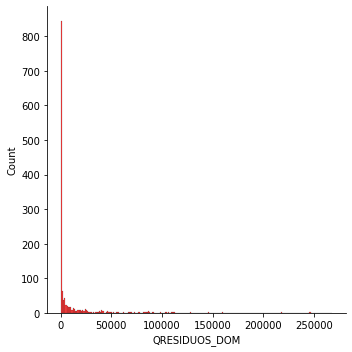

In [68]:
import seaborn as sea

sea.displot(dataLIMAmap.QRESIDUOS_DOM, color='red')

AttributeError: AttributeError: 'Series' object has no attribute 'columns'

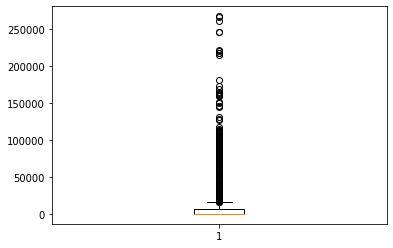

In [69]:
#Grafiquemos un boxplot
import matplotlib.pyplot as plt
plt.boxplot(dataLIMAmap.QRESIDUOS_DOM.values)
plt.xticks(range(1, len(dataLIMAmap.QRESIDUOS_DOM.columns) + 1), dataLIMAmap.QRESIDUOS_DOM.columns)
plt.ylabel('Valores')
plt.title('Boxplot')

In [70]:
import mapclassify 
import numpy as np

np.random.seed(12345)
K=5
ei5=mapclassify.EqualInterval(dataLIMAmap['QRESIDUOS_DOM'], k=K)
msd = mapclassify.StdMean(dataLIMAmap['QRESIDUOS_DOM'])
q5=mapclassify.Quantiles(dataLIMAmap['QRESIDUOS_DOM'],k=K)
mb5 = mapclassify.MaximumBreaks(dataLIMAmap['QRESIDUOS_DOM'], k=K)
ht = mapclassify.HeadTailBreaks(dataLIMAmap['QRESIDUOS_DOM'])
fj5 = mapclassify.FisherJenks(dataLIMAmap['QRESIDUOS_DOM'], k=K)
jc5 = mapclassify.JenksCaspall(dataLIMAmap['QRESIDUOS_DOM'], k=K)
mp5 = mapclassify.MaxP(dataLIMAmap['QRESIDUOS_DOM'], k=K)  

In [71]:
ht

HeadTailBreaks

       Interval          Count
------------------------------
[     2.62,  13220.47] |  1104
( 13220.47,  62726.53] |   163
( 62726.53, 114697.03] |    72
(114697.03, 180662.80] |    18
(180662.80, 233147.99] |     6
(233147.99, 257524.92] |     2
(257524.92, 265043.07] |     1
(265043.07, 267186.61] |     1
(267186.61, 267875.78] |     1

In [72]:
ht.yb

array([0, 0, 0, ..., 2, 2, 2])

In [73]:
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([1104,  163,   72,   18,    6,    2,    1,    1,    1]))

In [74]:
pd.Series(ht.yb).value_counts()

0 1104
1 163
2 72
3 18
4 6
5 2
6 1
7 1
8 1
dtype: int64

In [75]:
ht.bins

array([ 13220.47059211, 62726.53469697, 114697.03306931, 180662.79931034,
 233147.99090909, 257524.924 , 265043.07 , 267186.61 ,
 267875.78 ])

In [76]:
HT_bins=list(ht.bins)
HT_bins.insert(0,dataLIMAmap.QRESIDUOS_DOM.min())

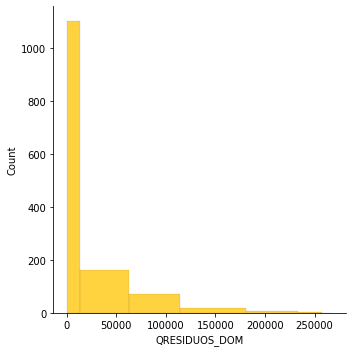

In [77]:
sea.displot(dataLIMAmap.QRESIDUOS_DOM, bins=HT_bins,color='#FFC300')
#Acomodamos los datos de manera que podamos graficar un histograma

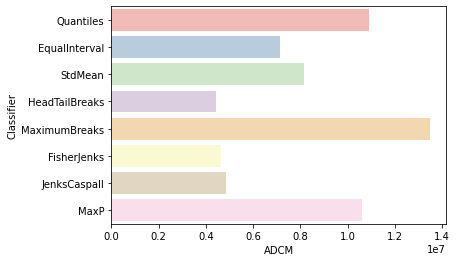

In [78]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)
#Notamos que los 3 clasificadores con menor ADCM son HeadTailBreaks, FisherJenks y JenksCaspall

In [79]:
dataLIMAmap['HTB'] = ht.yb 
dataLIMAmap['FJ'] = fj5.yb
dataLIMAmap['JC'] = jc5.yb

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

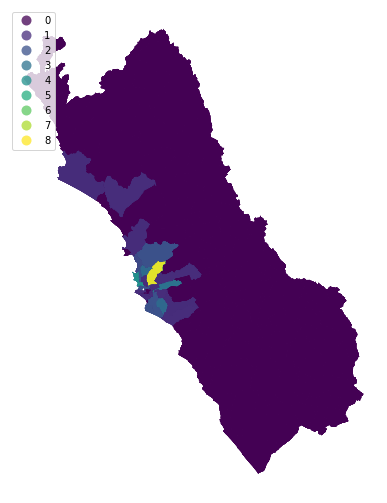

In [80]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='HTB', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

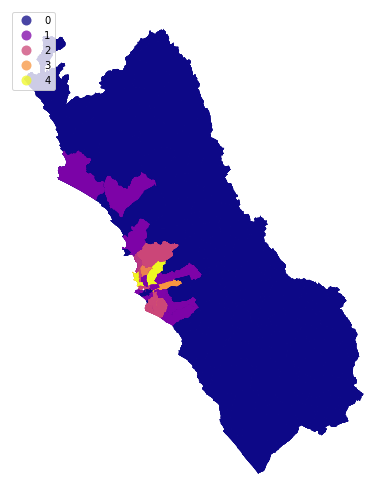

In [81]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='FJ', 
        cmap='plasma', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

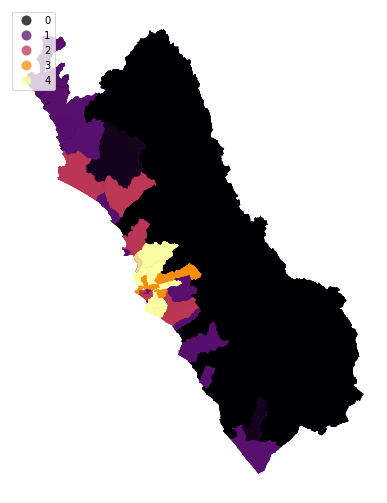

In [82]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='JC', 
        cmap='inferno', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [83]:
dataLIMAmap.to_file(os.path.join('maps',"dataMapLima.gpkg"), layer='distritos', driver="GPKG")

In [84]:
#EJERCICIO 3
#Para asegurarnos que las otras variables sean de tipo float las convertimos a float
datadismap['POB_TOTAL'] = datadismap['POB_TOTAL'].astype(float)
datadismap['POB_RURAL'] = datadismap['POB_RURAL'].astype(float)
datadismap['POB_URBANA'] = datadismap['POB_URBANA'].astype(float)

selected_variables = ['POB_TOTAL',
                     'POB_RURAL', 
                     'POB_URBANA']
dataLIMAmap[selected_variables].describe()

,POB_TOTAL,POB_RURAL,POB_URBANA
count,1.368000e+03,1368.000000,1.368000e+03
mean,5.981325e+04,947.016813,5.886623e+04
std,1.467224e+05,1869.692514,1.468467e+05
min,1.310000e+02,0.000000,9.000000e+01
25%,7.907500e+02,15.750000,4.567500e+02
50%,2.313000e+03,265.000000,1.280500e+03
75%,3.719425e+04,836.000000,3.598625e+04
max,1.203125e+06,12806.000000,1.203125e+06


<Axes: >

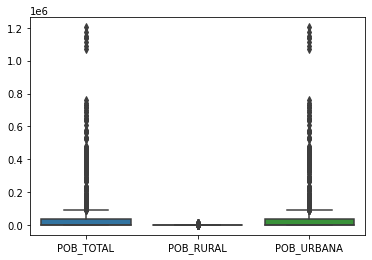

In [85]:
sea.boxplot(dataLIMAmap[selected_variables])

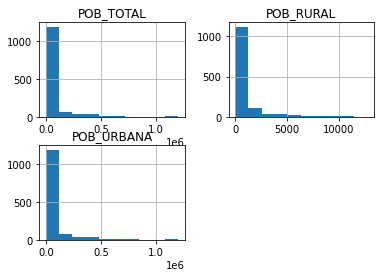

In [86]:
dataLIMAmap[selected_variables].hist();

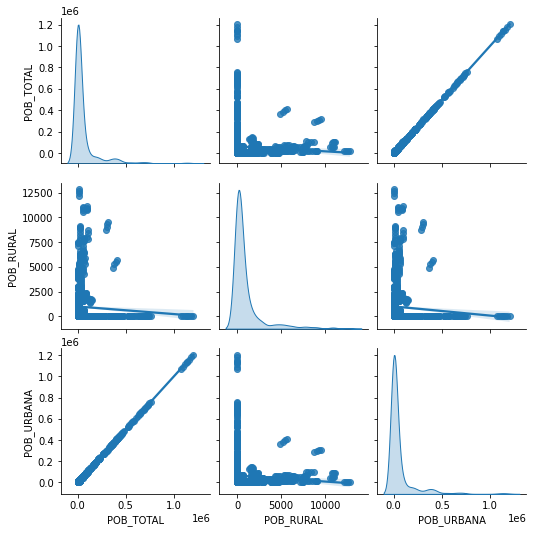

In [87]:
sea.pairplot(
    dataLIMAmap[selected_variables], kind="reg", diag_kind="kde"
)

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

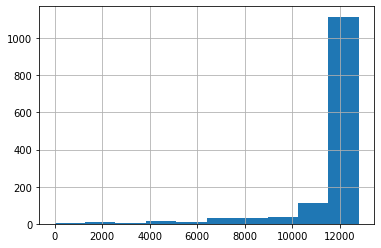

In [88]:
#La poblacion rural tiene una correlación negativa, entonces lo cambiamos
reverse=lambda x:abs(x-x.max())+x.min()

dataLIMAmap['POB_RURAL']=reverse(dataLIMAmap['POB_RURAL'])
dataLIMAmap['POB_RURAL'].hist()

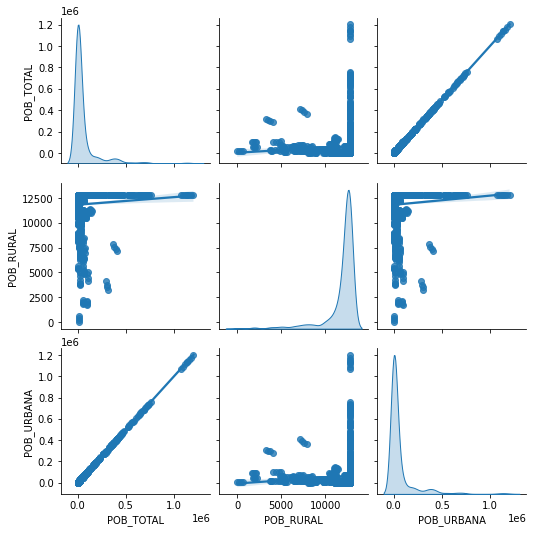

In [89]:
#Ahora todos tienen correlacion positiva
selected_variables_new = ['POB_TOTAL',
                     'POB_RURAL', 
                     'POB_URBANA']
sea.pairplot(
    dataLIMAmap[selected_variables_new], kind="reg", diag_kind="kde"
)

In [90]:
columnsToScale=selected_variables_new


from sklearn.preprocessing import robust_scale as rs
from sklearn.preprocessing import power_transform as pt
from sklearn.preprocessing import quantile_transform as qt

rs_result=rs(dataLIMAmap[columnsToScale])
pt_result=pt(dataLIMAmap[columnsToScale])
qt_result=qt(dataLIMAmap[columnsToScale])

<Axes: >

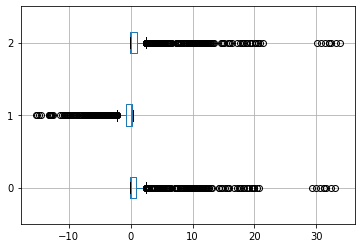

In [91]:
pd.DataFrame(rs_result).boxplot(vert=False)

<Axes: >

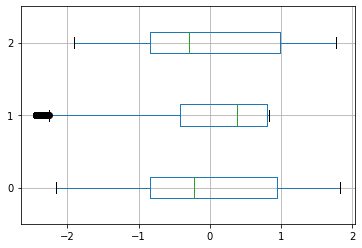

In [92]:
pd.DataFrame(pt_result).boxplot(vert=False)

<Axes: >

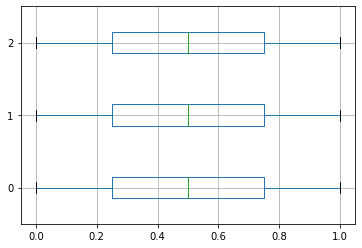

In [93]:
pd.DataFrame(qt_result).boxplot(vert=False)
#Nos quedamos con el qt_result

In [94]:
selected_variables_new_t=[s+'_t' for s in selected_variables_new ]
dataLIMAmap[selected_variables_new_t]=qt_result

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [95]:
#Evaluamos los schemes para variable POBLACION RURAL
K=4
ei4=mapclassify.EqualInterval(dataLIMAmap['POB_RURAL'], k=K)
msd4 = mapclassify.StdMean(dataLIMAmap['POB_RURAL'])
q4 = mapclassify.Quantiles(dataLIMAmap['POB_RURAL'],k=K)
mb4 = mapclassify.MaximumBreaks(dataLIMAmap['POB_RURAL'], k=K)
ht4 = mapclassify.HeadTailBreaks(dataLIMAmap['POB_RURAL'])
fj4 = mapclassify.FisherJenks(dataLIMAmap['POB_RURAL'], k=K)
jc4 = mapclassify.JenksCaspall(dataLIMAmap['POB_RURAL'], k=K)
mp4 = mapclassify.MaxP(dataLIMAmap['POB_RURAL'], k=K)  

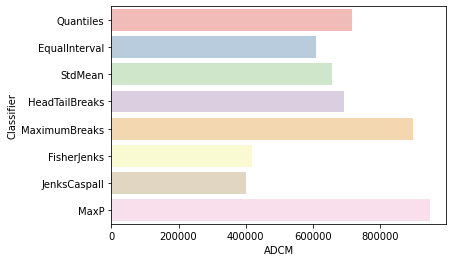

In [96]:
class5 = q4, ei4,msd4, ht4, mb4, fj4, jc4, mp4
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)
#Notamos que JenksCaspall es el recomendado

In [97]:
dataLIMAmap['JC'] = jc4.yb

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


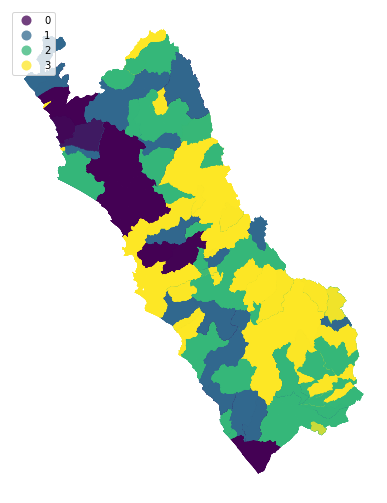

In [98]:
#Graficamos el mapa para POB_RURAL
f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='JC', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [99]:
#Ahora con la variable POBLACION TOTAL
K=4
ei4=mapclassify.EqualInterval(dataLIMAmap['POB_TOTAL'], k=K)
msd4 = mapclassify.StdMean(dataLIMAmap['POB_TOTAL'])
q4 = mapclassify.Quantiles(dataLIMAmap['POB_TOTAL'],k=K)
mb4 = mapclassify.MaximumBreaks(dataLIMAmap['POB_TOTAL'], k=K)
ht4 = mapclassify.HeadTailBreaks(dataLIMAmap['POB_TOTAL'])
fj4 = mapclassify.FisherJenks(dataLIMAmap['POB_TOTAL'], k=K)
jc4 = mapclassify.JenksCaspall(dataLIMAmap['POB_TOTAL'], k=K)
mp4 = mapclassify.MaxP(dataLIMAmap['POB_TOTAL'], k=K)  

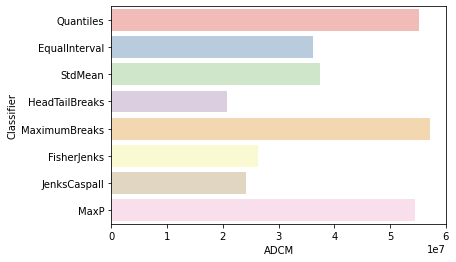

In [100]:
class4 = q4, ei4,msd4, ht4, mb4, fj4, jc4, mp4
fits = np.array([ c.adcm for c in class4])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class4]
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)
#Para poblacion total usamos HeadTailBreaks

In [101]:
dataLIMAmap['HTB'] = ht4.yb

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


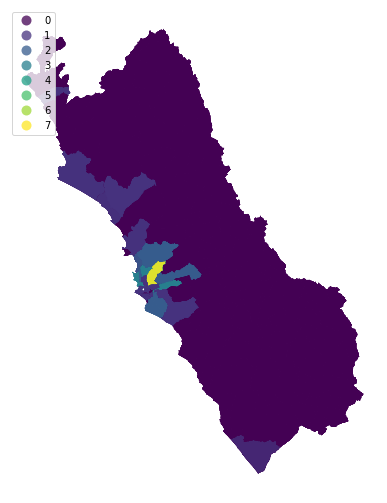

In [102]:
#Graficamos el mapa para POB_TOTAL
f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='HTB', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [103]:
#Finalmente graficamos para la POBLACION URBANA
K=4
ei_4=mapclassify.EqualInterval(dataLIMAmap['POB_URBANA'], k=K)
msd_4 = mapclassify.StdMean(dataLIMAmap['POB_URBANA'])
q_4 = mapclassify.Quantiles(dataLIMAmap['POB_URBANA'],k=K)
mb_4 = mapclassify.MaximumBreaks(dataLIMAmap['POB_URBANA'], k=K)
ht_4 = mapclassify.HeadTailBreaks(dataLIMAmap['POB_URBANA'])
fj_4 = mapclassify.FisherJenks(dataLIMAmap['POB_URBANA'], k=K)
jc_4 = mapclassify.JenksCaspall(dataLIMAmap['POB_URBANA'], k=K)
mp_4 = mapclassify.MaxP(dataLIMAmap['POB_URBANA'], k=K)  

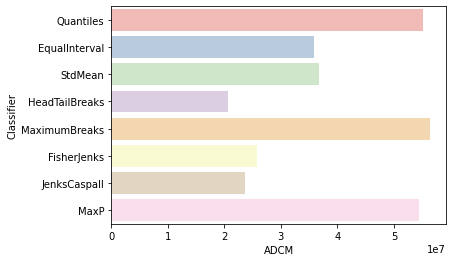

In [104]:
class_4 = q_4, ei_4,msd_4, ht_4, mb_4, fj_4, jc_4, mp_4
fits = np.array([ c.adcm for c in class_4])
adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class_4]
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)
#Aca tambien se recomienda utilizar HeadTailBreaks

In [105]:
dataLIMAmap['HT'] = ht_4.yb

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


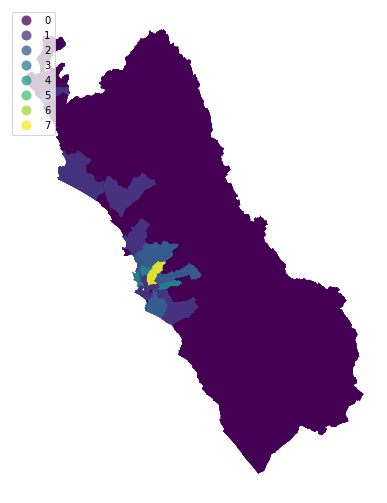

In [106]:
#Graficamos el mapa para POB_URBANA
f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(column='HT', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

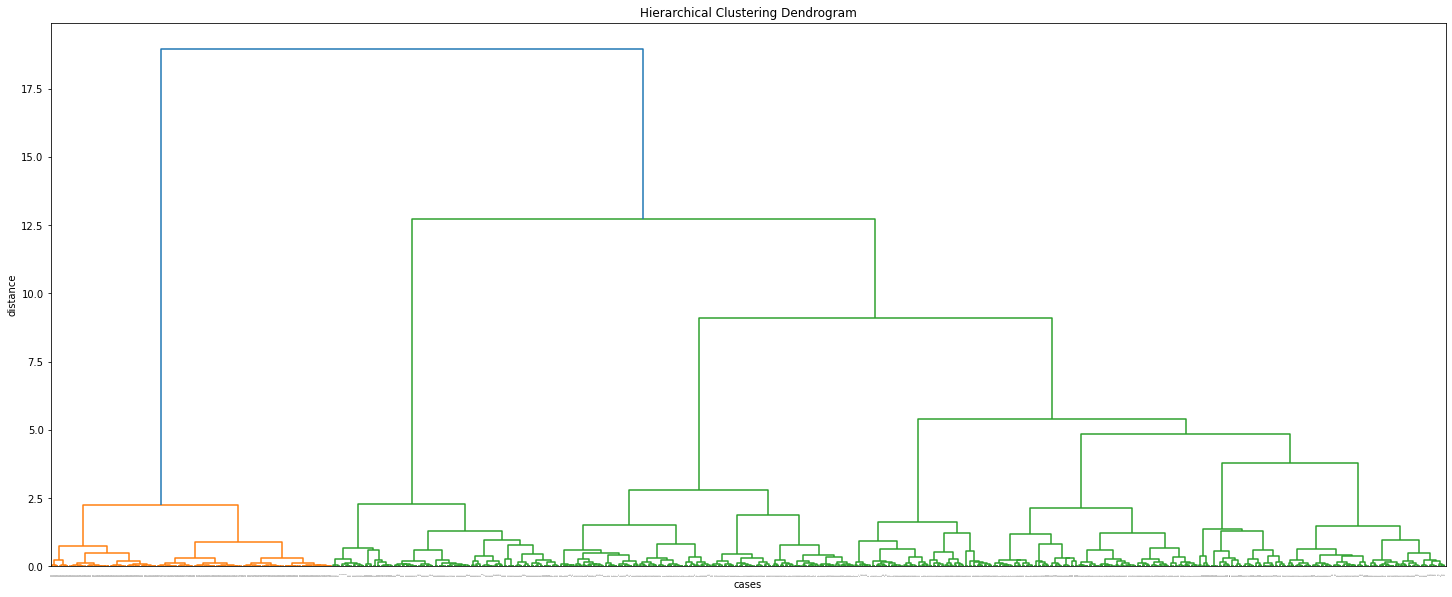

In [107]:
#EJERCICIO 4
from scipy.cluster import hierarchy as hc


Z = hc.linkage(qt_result, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cases')
plt.ylabel('distance')
hc.dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=1,  
)
plt.show()

In [108]:
from sklearn.cluster import AgglomerativeClustering as agnes

np.random.seed(12345)
model = agnes(linkage="ward", n_clusters=5).fit(dataLIMAmap[selected_variables_new_t])
dataLIMAmap["hc_5"] = model.labels_

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [109]:
dataLIMAmap["hc_5"].value_counts()

0 444
1 289
3 276
2 223
4 136
Name: hc_5, dtype: int64

In [110]:
dataLIMAmap.groupby("hc_5")[selected_variables_new].mean()

,POB_TOTAL,POB_RURAL,POB_URBANA
hc_5,,,
0,4587.599099,12394.277027,4175.858108
1,462.685121,12668.065744,324.737024
2,47333.466368,8715.883408,43243.336323
3,249591.666667,12806.000000,249591.666667
4,1553.352941,11623.977941,371.338235


In [111]:
dataLIMAmap_long = dataLIMAmap.set_index("hc_5").copy()
dataLIMAmap_long = dataLIMAmap_long[selected_variables_new]
dataLIMAmap_long = dataLIMAmap_long.stack()
dataLIMAmap_long = dataLIMAmap_long.reset_index()

dataLIMAmap_long = dataLIMAmap_long.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)

dataLIMAmap_long.head()

,hc_5,Attribute,Values
0,2,POB_TOTAL,54761
1,2,POB_RURAL,2255
2,2,POB_URBANA,44210
3,2,POB_TOTAL,55824
4,2,POB_RURAL,2051


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


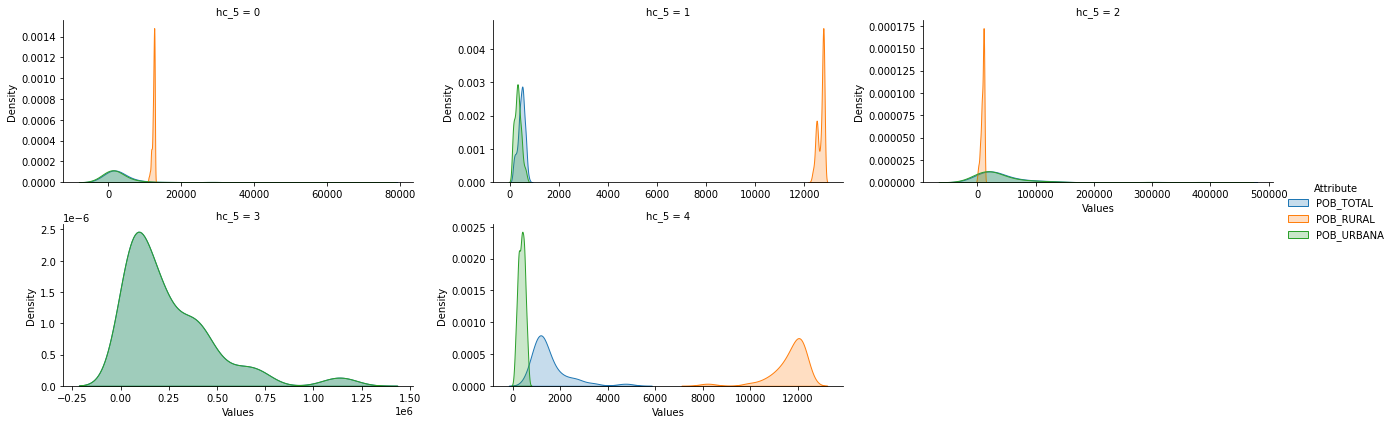

In [112]:
facets = sea.FacetGrid(
    data=dataLIMAmap_long,
    col="hc_5",
    hue="Attribute",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)

facets.map(sea.kdeplot, "Values", fill=True).add_legend()

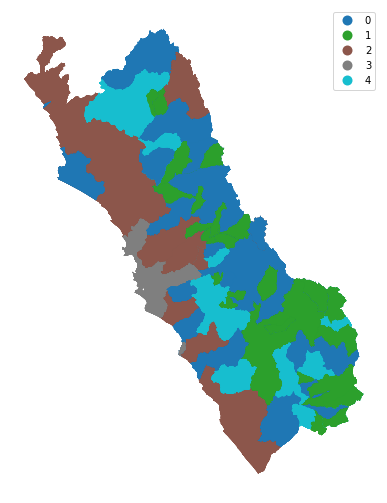

In [113]:
#Graficamos el mapa de cluster 
f, ax = plt.subplots(1, figsize=(9, 9))
dataLIMAmap.plot(
    column="hc_5", categorical=True, legend=True, linewidth=0, ax=ax
)

ax.set_axis_off()
plt.show()

In [114]:
#EJERCICIO 5
from libpysal.weights import Queen, Rook, KNN

w_rook = Rook.from_dataframe(dataLIMAmap) 

/opt/python/envs/default/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/opt/python/envs/default/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/opt/python/envs/default/lib/python3.8/site-packages/libp

In [115]:
w_queen = Queen.from_dataframe(dataLIMAmap)

In [116]:
w_knn = KNN.from_dataframe(dataLIMAmap, k=5)

/opt/python/envs/default/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 170 disconnected components.
  warnings.warn(message)


In [117]:
dataLIMAmap

,geometry,provDist,UBIGEO,REG_NAT,DEPARTAMENTO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_DOM,HTB,FJ,JC,POB_TOTAL_t,POB_RURAL_t,POB_URBANA_t,HT,hc_5
4781,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,54761,44210,2255,6253.00,0,0,0,0.782248,0.008016,0.771846,0,2
4782,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,55824,45069,2051,7896.03,0,0,0,0.786848,0.006748,0.773923,0,2
4783,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,56517,45629,1918,7161.47,0,0,0,0.788506,0.005176,0.774687,0,2
4784,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,57194,46175,1787,7247.17,0,0,0,0.789484,0.003809,0.775407,0,2
4785,"POLYGON ((-76.35671 -13.06032, -76.34833 -13.0...",CANETE+SAN VICENTE DE CANETE,150501,COSTA,LIMA,61017,54413,6203,8540.15,1,0,0,0.802905,0.028843,0.786372,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14973,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,357577,357577,12806,83268.96,2,2,3,0.945030,1.000000,0.945030,2,3
14974,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,388748,388748,12806,90527.68,2,2,3,0.953885,1.000000,0.953897,2,3
14975,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,397082,397082,12806,91309.01,2,2,3,0.955171,1.000000,0.956016,2,3
14976,"POLYGON ((-76.95742 -12.07604, -76.95741 -12.0...",LIMA+SANTIAGO DE SURCO,150140,COSTA,LIMA,408086,408086,12806,93839.38,2,2,3,0.959927,1.000000,0.960759,2,3


In [118]:
w_rook.neighbors[0] 

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87]

<Axes: >

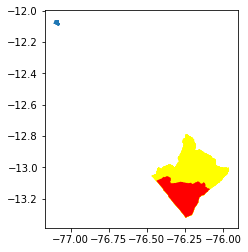

In [119]:
#Vecindarios ROOK
base=dataLIMAmap[dataLIMAmap.provDist=="LIMA+SAN MIGUEL"].plot()
dataLIMAmap.iloc[w_rook.neighbors[0] ,].plot(ax=base,facecolor="yellow")
dataLIMAmap.head(1).plot(ax=base,facecolor="red")

In [120]:
w_queen.neighbors[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87]

<Axes: >

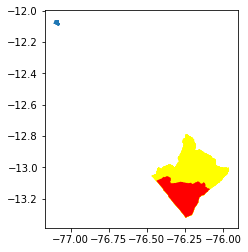

In [121]:
#Vecindarios QUEEN
base=dataLIMAmap[dataLIMAmap.provDist=="LIMA+SAN MIGUEL"].plot()
dataLIMAmap.iloc[w_queen.neighbors[0] ,].plot(ax=base,facecolor="yellow")
dataLIMAmap.head(1).plot(ax=base,facecolor="red")

In [122]:
w_knn.neighbors[0]

KeyError: KeyError: 0

KeyError: KeyError: 0

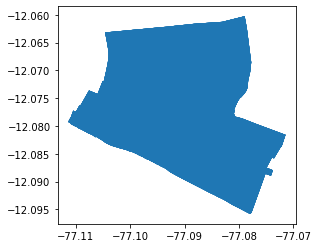

In [123]:
base=dataLIMAmap[dataLIMAmap.provDist=="LIMA+SAN MIGUEL"].plot()
dataLIMAmap.iloc[w_knn.neighbors[0],].plot(ax=base,facecolor="yellow")
dataLIMAmap.head(1).plot(ax=base,facecolor="red")

In [124]:
w_knn.neighbors

{4781: [4782, 4788, 4787, 4784, 4783],
 4782: [4781, 4788, 4787, 4784, 4783],
 4783: [4781, 4782, 4788, 4787, 4784],
 4784: [4781, 4782, 4788, 4787, 4783],
 4785: [4781, 4782, 4788, 4787, 4784],
 4786: [4781, 4782, 4788, 4787, 4784],
 4787: [4781, 4782, 4788, 4784, 4783],
 4788: [4781, 4782, 4787, 4784, 4783],
 4837: [4844, 4843, 4842, 4841, 4840],
 4838: [4844, 4843, 4842, 4841, 4840],
 4839: [4844, 4843, 4842, 4841, 4840],
 4840: [4844, 4843, 4842, 4841, 4837],
 4841: [4844, 4843, 4842, 4840, 4837],
 4842: [4844, 4843, 4841, 4840, 4837],
 4843: [4844, 4842, 4841, 4840, 4837],
 4844: [4843, 4842, 4841, 4840, 4837],
 4894: [4895, 4901, 4899, 4896, 4900],
 4895: [4894, 4901, 4899, 4896, 4900],
 4896: [4894, 4895, 4901, 4899, 4900],
 4897: [4894, 4895, 4901, 4899, 4896],
 4898: [4894, 4895, 4901, 4899, 4896],
 4899: [4894, 4895, 4901, 4896, 4900],
 4900: [4894, 4895, 4901, 4899, 4896],
 4901: [4894, 4895, 4899, 4896, 4900],
 4910: [4911, 4912, 4913, 4915, 4914],
 4911: [4910, 4912, 4913,

In [125]:
pd.DataFrame(*w_knn.full()).astype(int) 

,0,1,2,3,4,5,6,7,8,9,...,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367
4781,0,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4782,1,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4783,1,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4784,1,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4785,1,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0
14974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,0
14975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
14976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0


In [127]:
w_knn.nonzero

6840

In [126]:
w_knn.pct_nonzero

0.3654970760233918

In [128]:
w_knn.islands
#No hay distritos sin vecinos

[]

In [129]:
#EJERCICIO 6
w_knn.transform = 'R'

In [130]:
from esda.moran import Moran
#Inciaremos con la variable POB_TOTAL
moranPT = Moran(dataLIMAmap['POB_TOTAL'], w_knn)
moranPT.I,moranPT.p_sim

(0.9900657500152215, 0.001)

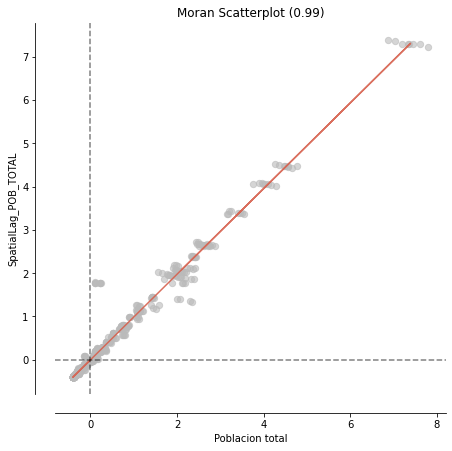

In [131]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranPT, aspect_equal=True)
ax.set_xlabel('Poblacion total')
ax.set_ylabel('SpatialLag_POB_TOTAL')
plt.show()

In [132]:
#Poblacion urbana
moranPU = Moran(dataLIMAmap['POB_URBANA'], w_knn)
moranPU.I,moranPU.p_sim

(0.9900288467833693, 0.001)

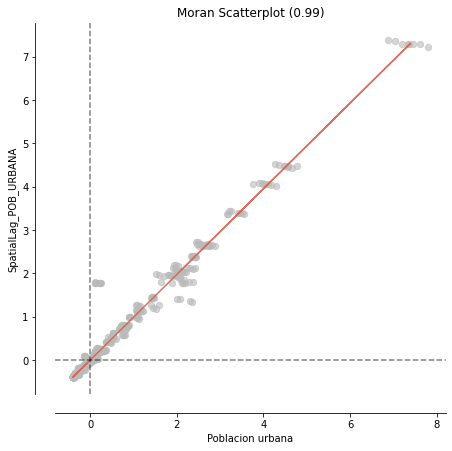

In [133]:
fig, ax = moran_scatterplot(moranPU, aspect_equal=True)
ax.set_xlabel('Poblacion urbana')
ax.set_ylabel('SpatialLag_POB_URBANA')
plt.show()

In [134]:
#Poblacion rural
moranPR = Moran(dataLIMAmap['POB_RURAL'], w_knn)
moranPR.I,moranPR.p_sim

(0.9108894510712685, 0.001)

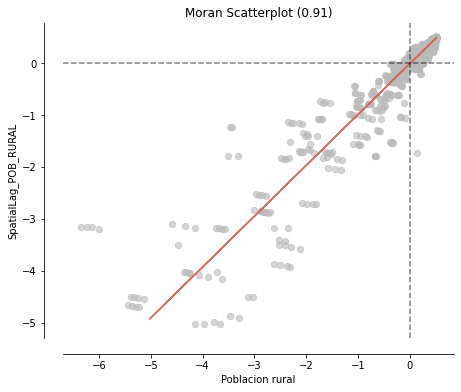

In [135]:
fig, ax = moran_scatterplot(moranPR, aspect_equal=True)
ax.set_xlabel('Poblacion rural')
ax.set_ylabel('SpatialLag_POB_RURAL')
plt.show()

In [136]:
#Cantidad de residuos por distrito
moranQR = Moran(dataLIMAmap['QRESIDUOS_DOM'], w_knn)
moranQR.I,moranQR.p_sim

(0.9465364814096757, 0.001)

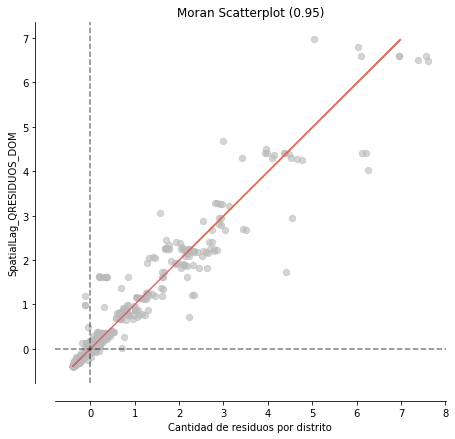

In [137]:
fig, ax = moran_scatterplot(moranQR, aspect_equal=True)
ax.set_xlabel('Cantidad de residuos por distrito')
ax.set_ylabel('SpatialLag_QRESIDUOS_DOM')
plt.show()

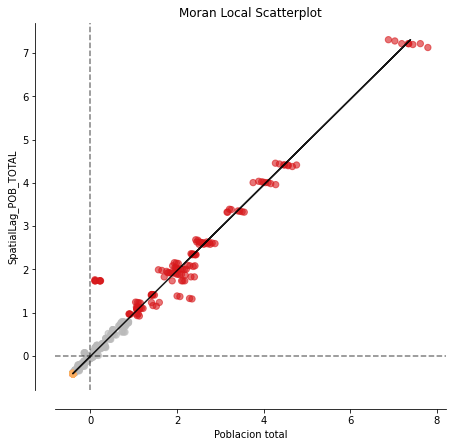

In [138]:
#EJERCICIO 7
#poblacion total
from esda.moran import Moran_Local
lisaP_T = Moran_Local(y=dataLIMAmap['POB_TOTAL'], w=w_knn,seed=2022)


In [139]:
lisaP_T.q

array([3, 3, 3, ..., 1, 1, 1])

In [141]:
lisaP_T.p_sim

array([0.404, 0.404, 0.404, ..., 0.005, 0.005, 0.005])

In [142]:
pd.Series(lisaP_T.q).value_counts()

3 1082
1 263
2 12
4 11
dtype: int64

In [143]:
dataLIMAmap['POB_TOTAL_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaP_T.q,lisaP_T.p_sim)  ]
dataLIMAmap['POB_TOTAL_quadrant'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0 627
3 597
1 144
Name: POB_TOTAL_quadrant, dtype: int64

In [146]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
dataLIMAmap['POB_TOTAL_quadrant_names']=[labels[i] for i in dataLIMAmap['POB_TOTAL_quadrant']]
dataLIMAmap['POB_TOTAL_quadrant_names'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0 no_sig 627
3 coldSpot 597
1 hotSpot 144
Name: POB_TOTAL_quadrant_names, dtype: int64

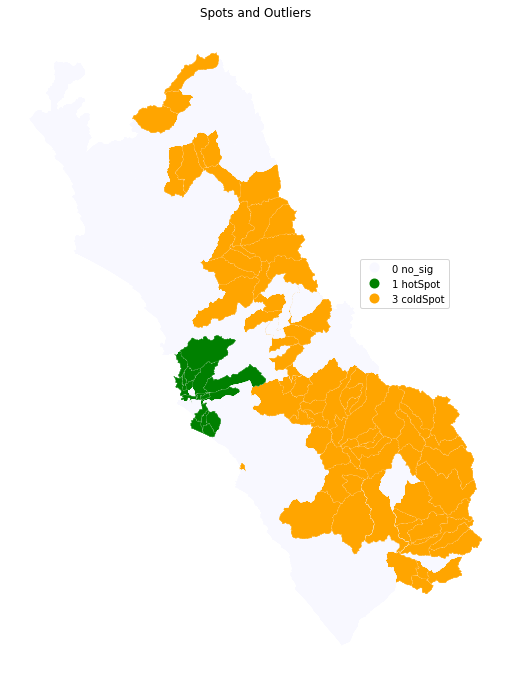

In [145]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

dataLIMAmap.plot(column='POB_TOTAL_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()

plt.show()

In [147]:
#Poblacion rural
lisaP_R = Moran_Local(y=dataLIMAmap['POB_RURAL'], w=w_knn,seed=2022)

In [148]:
dataLIMAmap['POB_RURAL_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaP_R.q,lisaP_R.p_sim)  ]
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
dataLIMAmap['POB_RURAL_quadrant_names']=[labels[i] for i in dataLIMAmap['POB_RURAL_quadrant']]
dataLIMAmap['POB_RURAL_quadrant_names'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0 no_sig 719
1 hotSpot 509
3 coldSpot 139
4 hotOutlier 1
Name: POB_RURAL_quadrant_names, dtype: int64

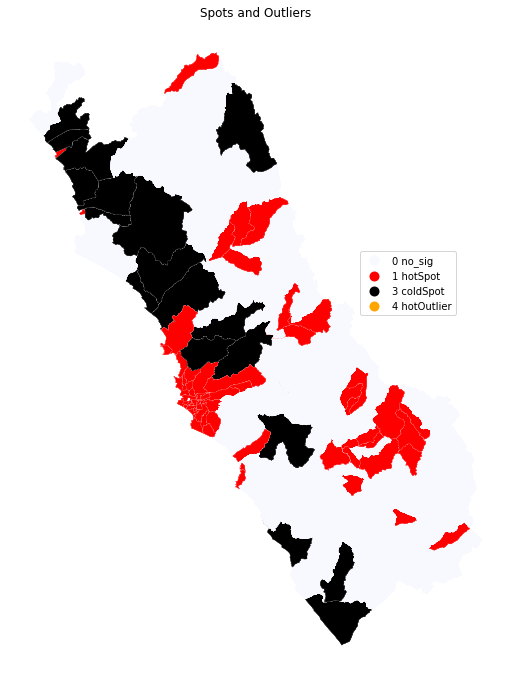

In [149]:
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

dataLIMAmap.plot(column='POB_RURAL_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()

plt.show()

In [150]:
#Poblacion urbana
lisaP_U = Moran_Local(y=dataLIMAmap['POB_URBANA'], w=w_knn,seed=2022)

In [151]:
dataLIMAmap['POB_URBANA_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaP_U.q,lisaP_U.p_sim)  ]
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
dataLIMAmap['POB_URBANA_quadrant_names']=[labels[i] for i in dataLIMAmap['POB_URBANA_quadrant']]
dataLIMAmap['POB_URBANA_quadrant_names'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3 coldSpot 633
0 no_sig 591
1 hotSpot 144
Name: POB_URBANA_quadrant_names, dtype: int64

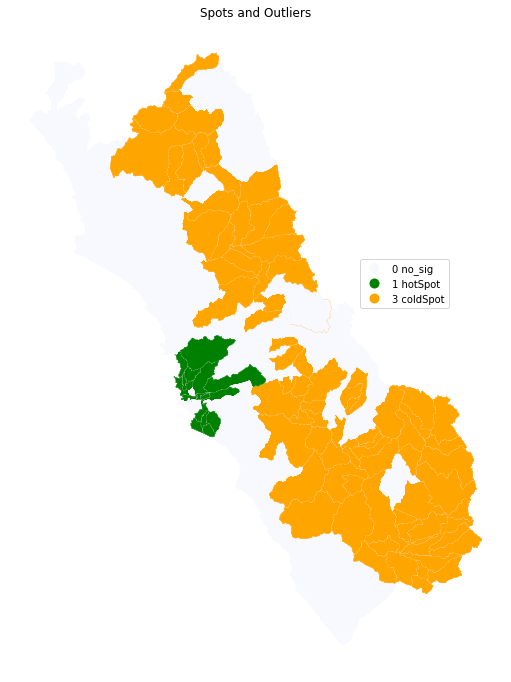

In [152]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

dataLIMAmap.plot(column='POB_URBANA_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()

plt.show()

In [153]:
#Cantidad de residuos
lisaQ_R = Moran_Local(y=dataLIMAmap['QRESIDUOS_DOM'], w=w_knn,seed=2022)

In [154]:
dataLIMAmap['QRESIDUOS_DOM_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaQ_R.q,lisaQ_R.p_sim)  ]
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
dataLIMAmap['QRESIDUOS_DOM_quadrant_names']=[labels[i] for i in dataLIMAmap['QRESIDUOS_DOM_quadrant']]
dataLIMAmap['QRESIDUOS_DOM_quadrant_names'].value_counts()

/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/python/envs/default/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3 coldSpot 653
0 no_sig 579
1 hotSpot 133
2 coldOutlier 3
Name: QRESIDUOS_DOM_quadrant_names, dtype: int64

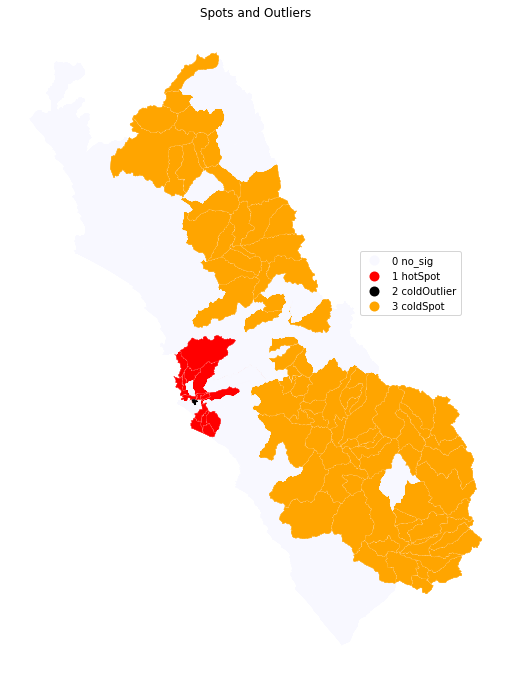

In [155]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

dataLIMAmap.plot(column='QRESIDUOS_DOM_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
ax.set_axis_off()

plt.show()

In [156]:
#Actualizamos
dataLIMAmap.to_file(os.path.join('maps',"dataMapLima.gpkg"), layer='distritos', driver="GPKG")